In [1]:
import requests
from bs4 import BeautifulSoup 

In [2]:
response= requests.get('https://www.sofascore.com/chelsea-west-ham-united/MsN#11352418', headers={'User-Agent': 'Mozilla/5.0'})

In [3]:
soup = BeautifulSoup(response.text, 'html.parser')

In [4]:
soup.select('g[cursor="pointer"]')

[]

In [5]:
headers = {
    'authority': 'api.sofascore.com',
    'accept': '*/*',
    'accept-language': 'en-US,en;q=0.9',
    'cache-control': 'max-age=0',
    'if-none-match': 'W/"01329af459"',
    'origin': 'https://www.sofascore.com',
    'referer': 'https://www.sofascore.com/',
    'sec-ch-ua': '"Chromium";v="116", "Not)A;Brand";v="24", "Microsoft Edge";v="116"',
    'sec-ch-ua-mobile': '?0',
    'sec-ch-ua-platform': '"Windows"',
    'sec-fetch-dest': 'empty',
    'sec-fetch-mode': 'cors',
    'sec-fetch-site': 'same-site',
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/116.0.0.0 Safari/537.36 Edg/116.0.1938.62',
}

response = requests.get('https://api.sofascore.com/api/v1/event/11352418/shotmap', headers=headers)

In [6]:
response

<Response [200]>

In [7]:
headers['If-Modified-Since'] = 'Sun, 20 AUG 2023 00:00:00 GMT'

In [8]:
response = requests.get('https://api.sofascore.com/api/v1/event/11352418/shotmap', headers=headers)
response

<Response [200]>

In [9]:
shots = response.json()
shots

{'shotmap': [{'player': {'name': 'Lucas Paquetá',
    'firstName': '',
    'lastName': '',
    'slug': 'lucas-paqueta',
    'shortName': 'L. Paquetá',
    'position': 'M',
    'userCount': 20521,
    'id': 839981},
   'isHome': True,
   'shotType': 'goal',
   'goalType': 'penalty',
   'situation': 'penalty',
   'playerCoordinates': {'x': 11.5, 'y': 50, 'z': 0},
   'bodyPart': 'left-foot',
   'goalMouthLocation': 'low-right',
   'goalMouthCoordinates': {'x': 0, 'y': 46.3, 'z': 3.8},
   'xg': 0.7884,
   'xgot': 0.9925,
   'id': 2157210,
   'time': 90,
   'addedTime': 5,
   'timeSeconds': 5686,
   'draw': {'start': {'x': 50, 'y': 11.5},
    'end': {'x': 53.7, 'y': 0},
    'goal': {'x': 53.7, 'y': 96.2}},
   'reversedPeriodTime': 1,
   'reversedPeriodTimeSeconds': 614,
   'incidentType': 'shot'},
  {'player': {'name': 'Noni Madueke',
    'firstName': '',
    'lastName': '',
    'slug': 'noni-madueke',
    'shortName': 'N. Madueke',
    'position': 'F',
    'userCount': 7660,
    'id': 9665

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from highlight_text import fig_text
import matplotlib as mpl
from mplsoccer.pitch import Pitch
import openpyxl
import os 

In [11]:
os.chdir("D:\DataSets")

In [12]:
text_color = 'w'
data = pd.read_excel('WHUvsCHE.xlsx')
data

,Player,Min,Sec,T,x,y,Shot Type,xG
0,E. Fernández,2,63,CHE,21.9,61.4,Missed,0.028625
1,J. Bowen,5,25,WHU,2.7,47.8,Saved,0.366907
2,N. Aguerd,7,37,WHU,5.6,45.8,Goal,0.126846
3,M. Antonio,13,72,WHU,14.0,54.6,Blocked,0.142591
4,N. Jackson,14,80,CHE,3.1,50.3,Missed,0.692233
5,S. Benrahma,17,97,WHU,21.1,26.8,Blocked,0.019568
6,T. Silva,20,11,CHE,7.8,57.5,Blocked,0.038967
7,C. Gallagher,21,12,CHE,25.0,65.2,Saved,0.029726
8,N. Jackson,22,12,CHE,14.5,49.3,Missed,0.093443
9,B. Chilwell,24,14,CHE,7.3,46.0,Missed,0.108999


Text(0.11, 0.03, '@GauravKSingh1/ GitHub')

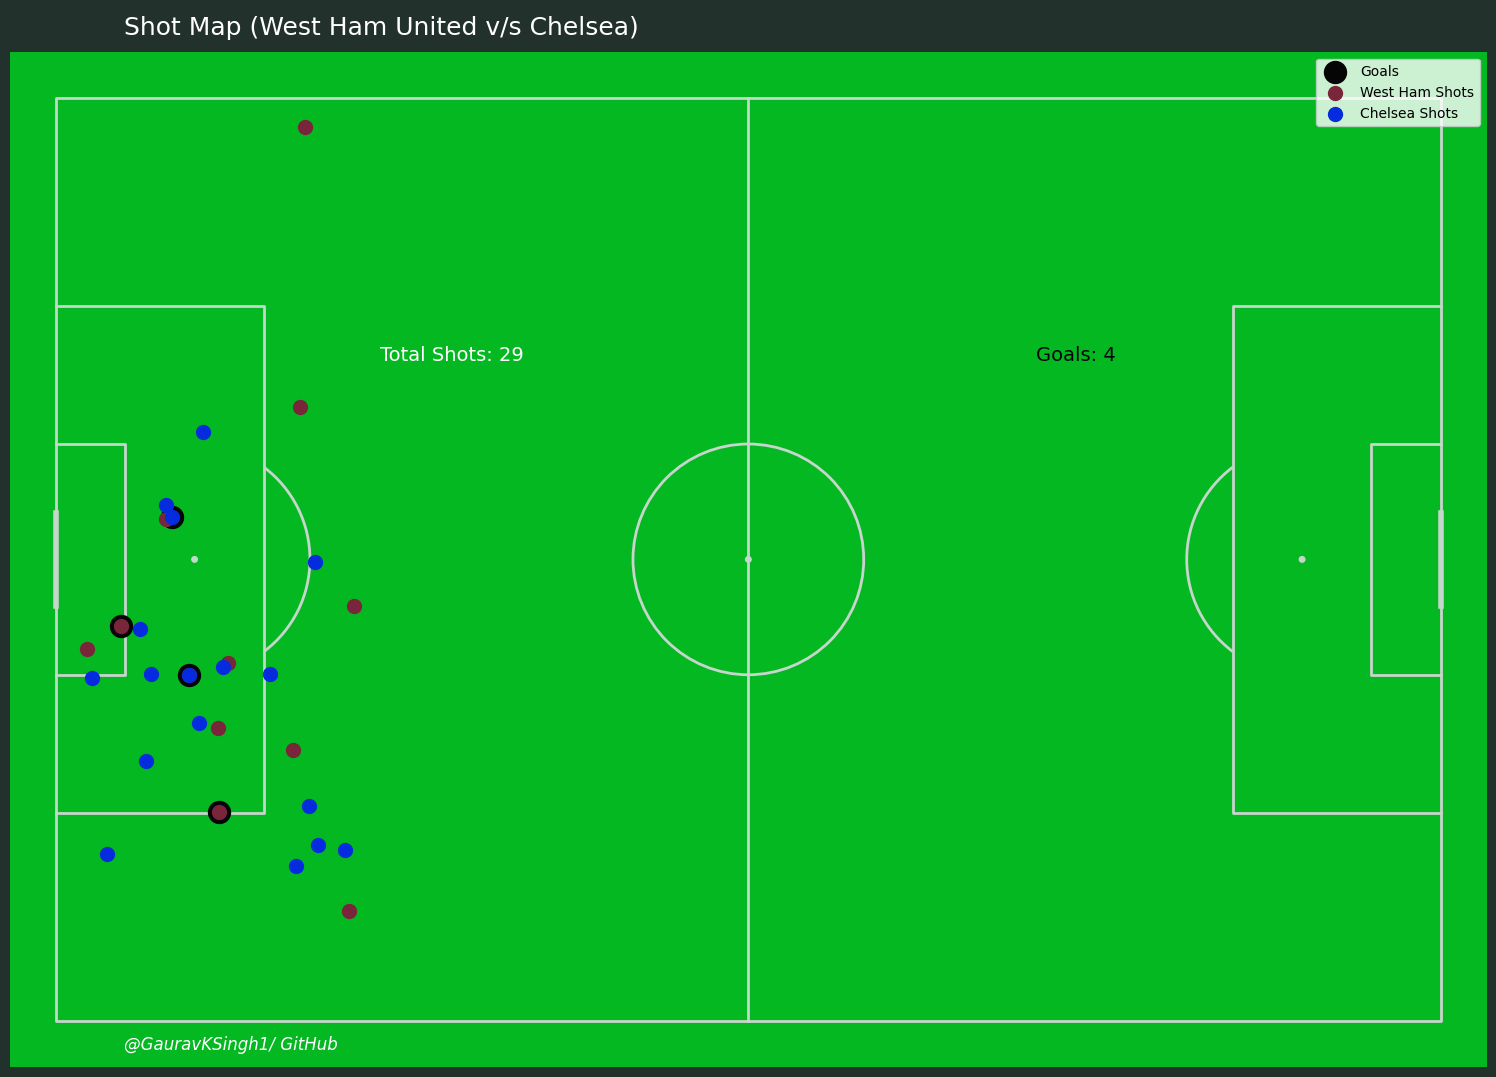

In [14]:
pitch = Pitch(pitch_type='statsbomb', pitch_color='#04b822', line_color='#c7d5cc')
fig, ax = plt.subplots(figsize=(16, 11), constrained_layout=True, tight_layout=False)
fig.set_facecolor('#22312b')

pitch.draw(ax=ax)


goals = data[data['Shot Type'] == 'Goal']
plt.scatter(goals['x'], goals['y'], s=250, c='#050505', alpha=1, label='Goals')

# Scatter plot for shots by Liverpool 
liverpool_shots = data[data['T'] == 'WHU']
plt.scatter(liverpool_shots['x'], liverpool_shots['y'], s=100, c='#7A263A', alpha=1, label='West Ham Shots')

# Scatter plot for shots by Chelsea 
chelsea_shots = data[data['T'] == 'CHE']
plt.scatter(chelsea_shots['x'], chelsea_shots['y'], s=100, c='#042cde', alpha=1, label='Chelsea Shots')

ax.legend(loc='upper right')


s='Shot Map (West Ham United v/s Chelsea)'
fig_text(s=s, x=.11, y=.97, fontsize=18, color=text_color)


total_shots = len(data)

fig_text(s=f'Total Shots: {total_shots}', x=.27, y =.67, fontsize=14, color=text_color)

fig_text(s=f'Goals: 4', x=.68, y =.67, fontsize=14, color='#050505')

fig.text(.11,.03,f'@GauravKSingh1/ GitHub',fontstyle='italic',fontsize=12, color=text_color)


In [15]:
df = pd.read_excel('xG WHUvsCHE.xlsx')
df

,Player,Min,Sec,T,x,y,Shot Type,xG
0,E. Fernández,2,63,CHE,21.9,61.4,Missed,0.028625
1,N. Jackson,14,80,CHE,3.1,50.3,Missed,0.692233
2,T. Silva,20,11,CHE,7.8,57.5,Blocked,0.038967
3,C. Gallagher,21,12,CHE,25.0,65.2,Saved,0.029726
4,N. Jackson,22,12,CHE,14.5,49.3,Missed,0.093443
5,B. Chilwell,24,14,CHE,7.3,46.0,Missed,0.108999
6,C. Chukwuemeka,28,16,CHE,10.0,36.3,Goal,0.107892
7,L. Colwill,32,18,CHE,8.2,49.9,Missed,0.075961
8,M. Gusto,35,20,CHE,18.5,49.9,Missed,0.047560
9,E. Fernández,43,2550,CHE,11.5,50.0,Saved,0.788400


In [16]:
a_xG = [0]
h_xG = [0]
a_min = [0]
h_min = [0]

hteam = df['T'].iloc[0]
ateam = df['T'].iloc[-1]

for x in range(len(data['xG'])):
    if df['T'][x] == ateam:
        a_xG.append(df['xG'][x])
        a_min.append(df['Min'][x])
    if df['T'][x] == hteam:
        h_xG.append(df['xG'][x])
        h_min.append(df['Min'][x])

# Function to calculate cumulative sum
def nums_cumulative_sum(nums_list):
    return [sum(nums_list[:i + 1]) for i in range(len(nums_list))]

# Calculate cumulative xG for both teams
a_cumulative = nums_cumulative_sum(a_xG)
h_cumulative = nums_cumulative_sum(h_xG)

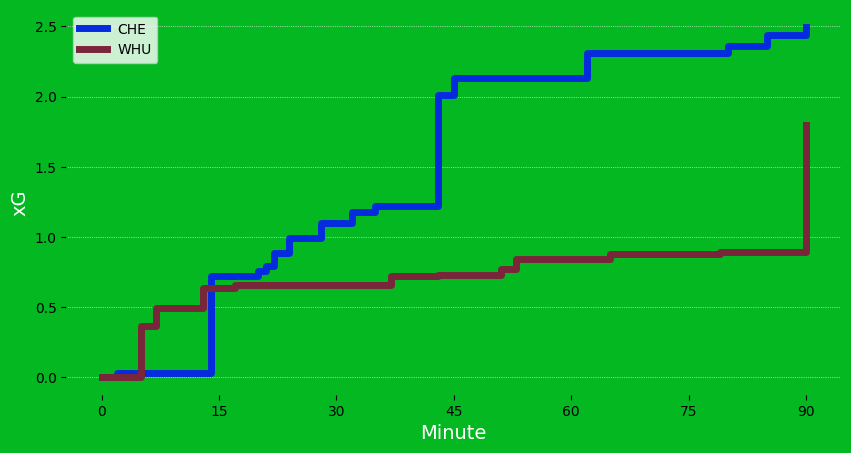

In [17]:
fig, ax = plt.subplots(figsize=(10, 5))
fig.set_facecolor('#04b822')
ax.patch.set_facecolor('#04b822')

mpl.rcParams['xtick.color'] = 'white'
mpl.rcParams['ytick.color'] = 'white'

ax.grid(ls='dotted', lw=0.5, color='white', axis='y', zorder=1)
spines = ['top', 'bottom', 'left', 'right']
for x in spines:
    ax.spines[x].set_visible(False)

plt.xticks([0, 15, 30, 45, 60, 75, 90])
plt.xlabel('Minute', color='white', fontsize=14)
plt.ylabel('xG', color='white', fontsize=14)

ax.step(x=h_min, y=h_cumulative, color='#042cde', label=hteam, linewidth=5, where='post', linestyle='-', alpha=1)
ax.step(x=a_min, y=a_cumulative, color='#7A263A', label=ateam, linewidth=5, where='post', linestyle='-', alpha=1)

ax.legend(loc='upper left', fontsize=10)

plt.show()